<a id='top'></a>
# *Lab 11: Link Prediction*

B210900803 E.Ulziimaa



Jaccard болон Adamic-Adar яагаад ялгаатай үр дүн үзүүлдэг вэ?


Jaccard ба Adamic-Adar нь холбоос илрүүлэх (link prediction) асуудалд хэрэглэгддэг үнэлгээний heuristics бөгөөд хоёулаа орон нутгийн (local) мэдээлэл ашигладаг боловч ялгаатай логиктой.

Jaccard Similarity:

Jaccard нь хоёр оройн хөршүүдийн давхцлыг бүх хөршүүдийн нийлбэртэй харьцуулдаг.
Хувь буюу пропорц хэмжинэ.
Том хэмжээтэй хөршүүдтэй оройнууд Jaccard-ын утгыг бууруулж болно.
Давхцал бага байсан ч олон хөрштэй бол Jaccard бага гарна.

Adamic-Adar Index:

Adamic-Adar нь нийтлэг хөрш бүрийн мэдээллийн агуулгыг тооцдог.

Нийтлэг хөрш бага хөрштэй байвал өндөр оноо авна.
Өндөр төвшний буюу "popular" оройнуудын нөлөөг багасгаж өгдөг.
Мэдээллийн үнэ цэнэ буюу "informativeness" илүү тусгагддаг.


Яагаад ялгаатай үр дүн гардаг вэ?

Хэрэв сүлжээнд олон том hub орой байвал Jaccard доогуур оноо өгөх хандлагатай байдаг.
Харин Adamic-Adar нь жижиг хөрштэй нийтлэг хөршүүдийг илүүд үздэг, өөр логиктой.
Үр дүн нь тухайн сүлжээний бүтэц (жишээ нь, scale-free эсвэл random) болон оройн degree-н хуваарилалтаас ихээхэн шалтгаалдаг.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import networkx as nx

# 1. Граф үүсгэх
G = nx.karate_club_graph()

# 2. Эерэг болон сөрөг хосууд үүсгэх
positive_edges = list(G.edges())  # Бодит холбоосууд
negative_edges = ...  # Хамааралгүй хосууд (гүй холбоос)

# 3. Feature vector үүсгэх (Jaccard, Adamic-Adar гэх мэт)
def extract_features(G, x, y):
    jaccard = list(nx.jaccard_coefficient(G, [(x, y)]))[0][2]
    aa = list(nx.adamic_adar_index(G, [(x, y)]))[0][2]
    return [jaccard, aa]

X = [extract_features(G, u, v) for u, v in positive_edges + negative_edges]
y = [1]*len(positive_edges) + [0]*len(negative_edges)

# 4. Decision Tree classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


linkpred санг ашиглан Decision Tree алгоритмаар холбоос илрүүлж болох уу?

Тийм, боломжтой. linkpred сан нь үндсэндээ heuristic суурилсан link prediction хийхэд зориулагдсан боловч, түүний гаргаж буй онцлог (features) дээр үндэслэн Decision Tree зэрэг supervised learning алгоритм ашиглах бүрэн боломжтой.

Алхамууд:

Feature extraction:

linkpred ашиглан Jaccard, Adamic-Adar, Preferential Attachment гэх мэт олон heuristics-г шинж чанар (feature) хэлбэрээр гаргаж авна.

Label хийх:

Өнгөрсөн хугацааны граф (training snapshot) дээр үндэслэн аль хосууд шинэ холбоос үүсгэсэн (positive), аль нь үүсгээгүй (negative) гэдгийг тэмдэглэнэ.

Decision Tree model:
Python-ийн sklearn.tree.DecisionTreeClassifier ашиглан supervised сургалт хийх.

Features: Jaccard, AA, CN, etc.

Label: холбоос үүссэн эсэх (1 эсвэл 0).

Training болон test:
Мэдээллийг train/test хувааж, model-ээ сургаад test dataset дээр шалгана.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# X: linkpred-ийн онцлогууд (Жакард, Адамик-Адар гэх мэт)
#y: шошго (холбоос үүссэн бол 1, үгүй ​​бол 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


<a id='install'></a>
## 1. LinkPred санг суулгах ([to top](#top))

Эхний алхам бол,  ``linkpred`` санг суулгах бөгөөд амжилттай суусан тохиолдолд уг сангын функцүүдтэй ажиллах боломжтой болно.

Санг суулгахдаа ``pip`` ашиглаж болно.

    pip install linkpred

In [ ]:
pip install linkpred

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for linkpred: filename=linkpred-0.5.1-py3-none-any.whl size=28744 sha256=3a9a204264f328516d04ee10a2259703b1a69b9459c0ee4cca03cf99913d37f7
  Stored in directory: /root/.cache/pip/wheels/cc/24/15/4f18e6e3718786d97d74dd34e68744b063a338ca1fd677e055
  Created wheel for smokesignal: filename=smokesignal-0.7.0-py3-none-any.whl size=6031 sha256=ca58e8406cda43dc13f445c26b30dee50addc16c349ecb9c418d8c1bc1f6b723
  Stored in directory: /root/.cache/pip/wheels/4b/b3/8e/a6eb57fab0fecdd37e8ffb5e602cde85ea095ed4d2d2f6c499
Successfully built linkpred smokesignal


In order to check if ``linkpred`` сан амжилттай суусан эсэхийг шалгахдаа дараах байдлаар кодондоо оруулж ирж болж байна уу гэж үзнэ.

In [ ]:
import linkpred

<a id='workflow'></a>
## 2. Таамаглах үйл явцын дараалал

``linkpred`` нь дараах 3-н үе шаттайгаар Холбоосыг таамаглах үйл явцыг биелүүлдэг.

1. Сүлжээгээ байгуулах - Network Loading
2. Таамаглагчаа сонгох, аппликейшн - Predictor selection and application
3. Үр дүн үнэлэх - Results evaluation

<a id='graph'></a>
### 2.A Файлаас уншиж сүлжээг байгуулах

Эхлээд, ``linkpred`` нь файлаас графыг уншихыг шаарддаг. Бид энэ удаа  Game of Thrones Season 6 (Хаадын тоглоом цуврал)-ийн ирмэгүүдийг мэдээллийг ашиглана.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1], weight=int(l[2]))
    return g

# Game of Thrones data
g = read_net_w(f'/content/sample_data/got-s6-edges.csv')

In [ ]:
nx.draw(g)

<a id='pred'></a>
### 2.B Удирдлагагүй сургалтын таамаглагч тооцоолох

``linkpred`` нь 4 бүлэг удирдлагагүй сургалтын таамаглагчид өргөн хэрэглэгдэж байна. Үүнд:
- **Neighborhood:**
    - *AdamicAdar*, AssociationStrength, *CommonNeighbours*, Cosine, DegreeProduct, *Jaccard*, MaxOverlap, MinOverlap, NMeasure, Pearson,ResourceAllocation
- **Paths:**
    - GraphDistance, *Katz*
- **Ranking:**
    - *SimRank*, RootedPageRank
- **Miscellanea:**
    - Community, Copy, *Random*
    
Энэ лаборатороор бид цөөн хэдэн аргыг орууллаа.

Энгийн ойлгомжтой байлгахын тулд бид сонгогдсон таамаглагч бүрт топ-5 нь үр дүнг харууллаа.

#### 2.B.1 Neighborhood

Эхний хэсэг бүлэг таамаглагч бол зангилаа бүрийн хувьд холбогдох боломжтой хос оройг уг хоёр оройн хөрш оройнуудтайгаа хэр хүчтэй сул холбогдсон байдлаас үүдэн холбоосыг үүсэх эсэх магадлалаар олдог.
 </br>
Энэ төрлийн таамаглагчид нь дараах асуултанд хариулт олохыг хичээдэг.
 *How many friend we have to share in order to become friends?*

##### **Common Neighbors**

Илүү олон дундын найзуудтай бол бид найз болох магадлал өндөр байна.

In [ ]:
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges()) # We aim to predict only new links, thus we exclude existing ones
cn_results = cn.predict()

top = cn_results.top(5)
for edge, score in top.items():
    print(edge, score)

TOMMEN - MACE 8.0
NED - LADY_CRANE 8.0
NED - CLARENZO 8.0
MARGAERY - IZEMBARO 8.0
MARGAERY - ARYA 8.0


##### **Jaccard**
Топологи бүтэц болон аттрибутуудын ижил төсөөтэй байдал нь найз болох эсэхийг тодорхойлно.

In [ ]:
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
jc_results = jc.predict()

top = jc_results.top(5)
for edge, score in top.items():
    print(edge, score)

RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


##### **Adamic Adar**
Бидний дундын найзын тоо нь биднийг найз болох эсэхийг тодорхойлоход ашиглагдана.

In [ ]:
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
aa_results = aa.predict()

top = aa_results.top(5)
for edge, score in top.items():
    print(edge, score)

TOMMEN - MACE 3.187557281030789
NED - LADY_CRANE 3.126371165725783
NED - CLARENZO 3.126371165725783
SANSA - ROBB 3.096644315133247
JOFFREY - CAMELLO 2.8944937119329133


#### 2.B.2 Paths

Хоёрдогч төрлийн таамаглагчид нь хос оройн хоорондын зайнаас хамаарч тэд ирээдүйд холбогдох эсэхийг магадлаар боддог.
</br>
Энэ төрлийн таамаглагчид нь дараах асуултад хариулт олохыг хичээдэг: *How distant are we?*


##### **Katz**
Katz computes the weighted sum over all the paths between two nodes.

In [ ]:
kz = linkpred.predictors.Katz(g, excluded=g.edges())
kz_results = kz.predict()

top = kz_results.top(5)
for edge, score in top.items():
    print(edge, score)


LADY_CRANE - JAQEN 0.005571576860773001
SANSA - ALLISER_THORNE 0.004234378077202
TYRION - DAARIO 0.004145905054793999
CERSEI - BRIENNE 0.0038862606857720003
MELISANDRE - LYANNA_MORMONT 0.0035937193855959996


##### **Graph Distance**
Графын зай буюу Distance нь хоёр оройн хоорондын богино замын уртаар тодорхойлогдоно.

In [ ]:
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
gd_results = gd.predict()

top = gd_results.top(5)
for edge, score in top.items():
    print(edge, score)

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


#### 2.B.3 Rankig
Гуравдагч бүлэг таамаглагчид нь граф дахь хос оройнуудын байрлалаас хамаарч холбогдох магадлалыг тооцоолно.
 </br>
Дараах асуултанд хариулж буй байдлаас хамаарч тодорхойлогдоно: *How similar are we?

##### **SimRank**
Хоёр зангилаа холбоосоор холбогдохын тул тэдгээрийн хөрш оройнууд ижил төсөөтэй байх хэрэгтэй.

In [ ]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
simrank_results = simrank.predict(c=0.5)

top = simrank_results.top(5)
for edge, score in top.items():
    print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


#### 2.B.4 Miscellanea
Энэ нь холбоосыг таамаглахдаа санамсаргүй байдлаар сонгож авдаг.
 </br>
``linkpred`` groups here approaches that are commonly used as baselines.

##### **Random**
Санамсаргүй байдлаар таах.

In [ ]:
rnd = linkpred.predictors.Random(g, excluded=g.edges())
rnd_results = rnd.predict()

top = simrank_results.top(5)
for edge, score in top.items():
    print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


<a id='eval'></a>
### 2.C Ялгаатай таамаглагчидын харьцуулах болон үнэлэх
Холбоосуудыг үүсэх эсэхыг таамаглахдаа бид сургалтын болон тестийн өгөгдлүүдтэй ажиллаж шалгана. Өгөгдлөө сургалтын болон тестийн болгон хуваах шаардлагатай.

In [ ]:
import random
import itertools
from linkpred.evaluation import Pair

# Building the test network
test = read_net_w(f'/content/sample_data/got-s7-edges.csv')

# Exclude test network from learning phase
training = g.copy()

# Node set
nodes = list(g.nodes())
nodes.extend(list(test.nodes()))

# Compute the test set and the universe set
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

Дараагаар нь бид сургалтын өгөгдөл дээрээ таамаглагчаа ажиллуулна.

In [ ]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

Тэгээд бид тестийн өгөгдлөө ашиглан таамаглагч хэр үнэн таамаглаж буй үнэлнэ.


In [ ]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

Үр дүнгүүдээ тайлбарлахдаа бид ROC -ийн муруй ашиглан дүрслэнэ.

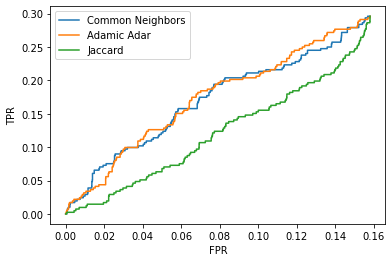

In [ ]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()

Үр дүнгээ нэгтгэн тайлбарлах, дүгнэхэд хамгийн тохиромжтой, энгийн арга нь ROC муруй болон үүн дээр AUC бодож үзэх юм.

In [ ]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.026832485313825823
Adamic Adar: 	 0.027259225458645765
Jaccard: 	 0.018894838921578106
